# Using CNNs with a regression head to predict material parameters from the time domain

In [1]:
import torch
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt


import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import confusion_matrix, accuracy_score
from models.utils import identify_device, display_model
from models.Regression_models import CNN1D_Regressor, train_model
from models.regression_utils import get_train_val_loaders

In [2]:
device = identify_device()

# Load the dataset with weights_only=False
file_path = "regression_data/train_3_layer_nonoise_n1to8.pt"


train_loader, val_loader = get_train_val_loaders(
    dataset_path=file_path,
    batch_size=128,
    val_split=0.2
)

Using device: cuda
Loading data from regression_data/train_3_layer_nonoise_n1to8.pt
Dataset loaded successfully!
Number of samples: 30000
Shape of input pulse: torch.Size([1, 1024]), target vector: torch.Size([9])


In [6]:
display_model(model, device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 64, 1024]             384
         GroupNorm-2             [-1, 64, 1024]             128
         MaxPool1d-3              [-1, 64, 512]               0
            Conv1d-4             [-1, 128, 512]          41,088
         GroupNorm-5             [-1, 128, 512]             256
         MaxPool1d-6             [-1, 128, 256]               0
            Conv1d-7             [-1, 256, 256]          98,560
         GroupNorm-8             [-1, 256, 256]             512
         MaxPool1d-9             [-1, 256, 128]               0
           Conv1d-10             [-1, 256, 128]         196,864
        GroupNorm-11             [-1, 256, 128]             512
        MaxPool1d-12              [-1, 256, 64]               0
AdaptiveAvgPool1d-13               [-1, 256, 1]               0
           Linear-14                   

In [ ]:
model = CNN1D_Regressor()
display_model(model, device=device)

results = train_model(model, train_loader, val_loader, num_epochs=200, lr=0.0001, verbose_level='batch')

([0.09718466141915068,
  0.08256630464754205,
  0.08017264144059191,
  0.07805281394022576,
  0.07367099801752161,
  0.07181138846468418,
  0.06892847975200796,
  0.0663444768597788,
  0.06429919501409885,
  0.06347527222192668,
  0.06255670785507624,
  0.06183694540820223,
  0.06143014202330341,
  0.061254670367913044,
  0.060813143552142256,
  0.06092406286204115,
  0.06073445289772242,
  0.06034585669081896,
  0.06013273297155157,
  0.05989869777113199],
 [0.07589410673430626,
  0.07561710619545997,
  0.0741579329713862,
  0.07126631159731682,
  0.0678563154441245,
  0.06700468324917427,
  0.06445727330890108,
  0.061951017918738915,
  0.05974750886572168,
  0.058839806058305376,
  0.05855840999395289,
  0.05891709560726551,
  0.057923947322241806,
  0.05792885765116265,
  0.05764557088309146,
  0.05927080668984575,
  0.05705475387104014,
  0.056401308863720995,
  0.05645509928147843,
  0.056759608552810994])

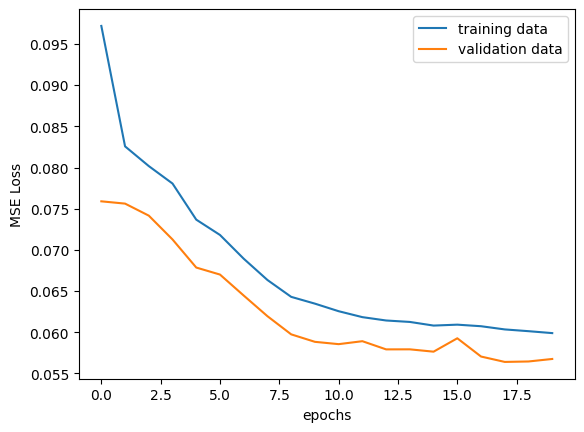

In [7]:
plt.plot(results[0], label='Training data')
plt.plot(results[1], label='Validation data')
plt.xlabel('epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), 'trained_models/regression_model_train_on_60k_clean_lr0_0001_epochs_200.pth')